##Q2 ##
Below four files are used for analysis.
"C:\Users\Sai\Desktop\Q2\01_District_wise_crimes_committed_IPC_2001_2012.csv"
"C:\Users\Sai\Desktop\Q2\02_01_District_wise_crimes_committed_against_SC_2001_2012.csv"
"C:\Users\Sai\Desktop\Q2\02_District_wise_crimes_committed_against_ST_2001_2012.csv"
"C:\Users\Sai\Desktop\Q2\03_District_wise_crimes_committed_against_children_2001_2012.csv"

Steps:
pandas: For data manipulation (loading, cleaning, aggregating, and merging).
matplotlib.pyplot: For data visualization (plotting graphs)
File paths to four different datasets:
IPC Crimes (Indian Penal Code crimes)
Crimes Against Scheduled Castes (SC)
Crimes Against Scheduled Tribes (ST)
Crimes Against Children
Reads each dataset into a Pandas DataFrame
Ensures consistency by renaming columns.
The "YEAR" column is renamed to "Year" in df_ipc.
Groups data by "STATE/UT" and "Year".
Sums total crimes per year for each state.
Merges all crime datasets based on "STATE/UT" and "Year".
Uses how="left" → Ensures all states in IPC dataset remain, even if other datasets have missing values.
Renames overlapping columns for clarity
Filters only the selected states for visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_paths = {
    "IPC Crimes":r"C:\Users\Sai\Desktop\Q2\01_District_wise_crimes_committed_IPC_2001_2012.csv",
    "Crimes Against SC":r"C:\Users\Sai\Desktop\Q2\02_01_District_wise_crimes_committed_against_SC_2001_2012.csv",
    "Crimes Against Children": r"C:\Users\Sai\Desktop\Q2\03_District_wise_crimes_committed_against_children_2001_2012.csv",
    "Crimes Against ST": r"C:\Users\Sai\Desktop\Q2\02_District_wise_crimes_committed_against_ST_2001_2012.csv"}


df_ipc = pd.read_csv(file_paths["IPC Crimes"])
df_sc = pd.read_csv(file_paths["Crimes Against SC"])
df_children = pd.read_csv(file_paths["Crimes Against Children"])
df_st = pd.read_csv(file_paths["Crimes Against ST"])


df_ipc.rename(columns={"YEAR": "Year"}, inplace=True)
df_sc.rename(columns={"STATE/UT": "STATE/UT"}, inplace=True)
df_children.rename(columns={"STATE/UT": "STATE/UT"}, inplace=True)
df_st.rename(columns={"STATE/UT": "STATE/UT"}, inplace=True)


ipc_statewise = df_ipc.groupby(["STATE/UT", "Year"])["TOTAL IPC CRIMES"].sum().reset_index()
sc_statewise = df_sc.groupby(["STATE/UT", "Year"]).sum().reset_index()
children_statewise = df_children.groupby(["STATE/UT", "Year"]).sum().reset_index()
st_statewise = df_st.groupby(["STATE/UT", "Year"]).sum().reset_index()


crime_trends = ipc_statewise.merge(sc_statewise, on=["STATE/UT", "Year"], how="left")
crime_trends = crime_trends.merge(children_statewise, on=["STATE/UT", "Year"], how="left")
crime_trends = crime_trends.merge(st_statewise, on=["STATE/UT", "Year"], how="left")

crime_trends.rename(columns={
    "Murder": "Murder_SC",
    "Rape": "Rape_SC",
    "Kidnapping Abduction": "Kidnapping_Abduction_SC",
    "Dacoity": "Dacoity_SC",
    "Robbery": "Robbery_SC",
    "Arson": "Arson_SC",
    "Hurt": "Hurt_SC",
    "Protection of Civil Rights (PCR) Act": "PCR_Act_SC",
    "Prevention of atrocities (POA) Act": "POA_Act_SC",
    "Other Crimes Against STs": "Other_Crimes_ST"
}, inplace=True)

selected_states = ["Uttar Pradesh", "Maharashtra", "Bihar", "Madhya Pradesh", "Delhi"]
crime_trends_filtered = crime_trends[crime_trends["STATE/UT"].isin(selected_states)]



NumPy is imported to handle numerical operations if needed
plt.cm.get_cmap("tab10", len(crime_columns)):
Retrieves a color map with tab10, which provides 10 distinct colors.
It ensures each crime type gets a unique color.
Creates a dictionary (crime_colors) mapping each crime category to a unique color.
Iterates over all unique states in the dataset.
Filters crime_trends to get data for the current state
Creates a new figure with size (14,7) inches.
Loops through each crime category and plots it against the years.
Labels the crime for legend reference.
Uses a unique color for each crime category
Sets X and Y labels → "Year" and "Number of Crimes".
Adds title dynamically for each state.
Displays a legend showing different crime types.
Enables grid for readability.
Displays the graph using plt.show().

C:\Users\Sai\AppData\Local\Temp\ipykernel_17060\107959809.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("tab10", len(crime_columns))


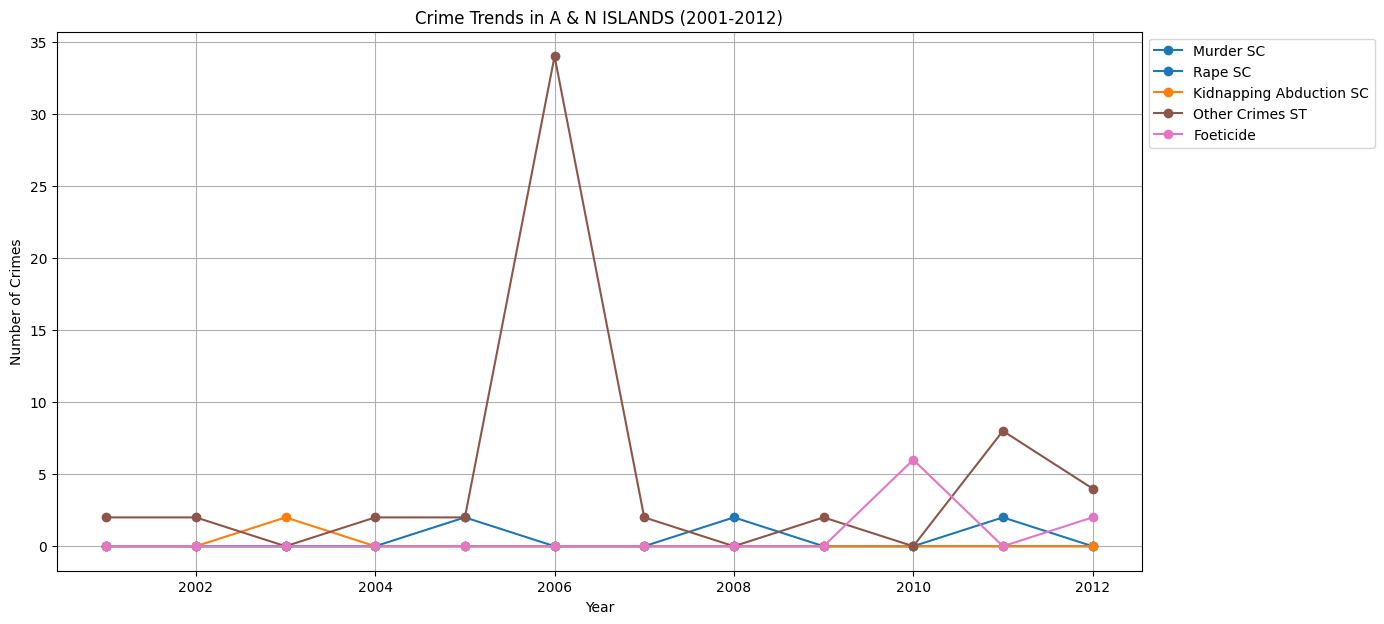

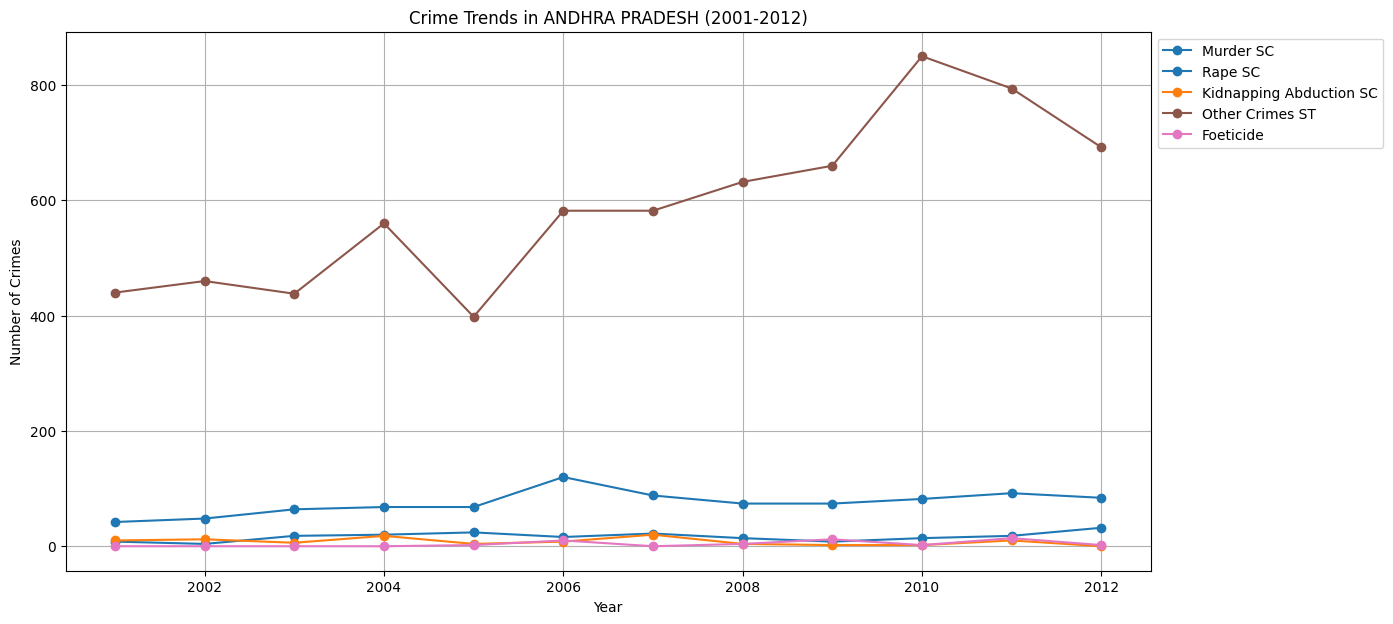

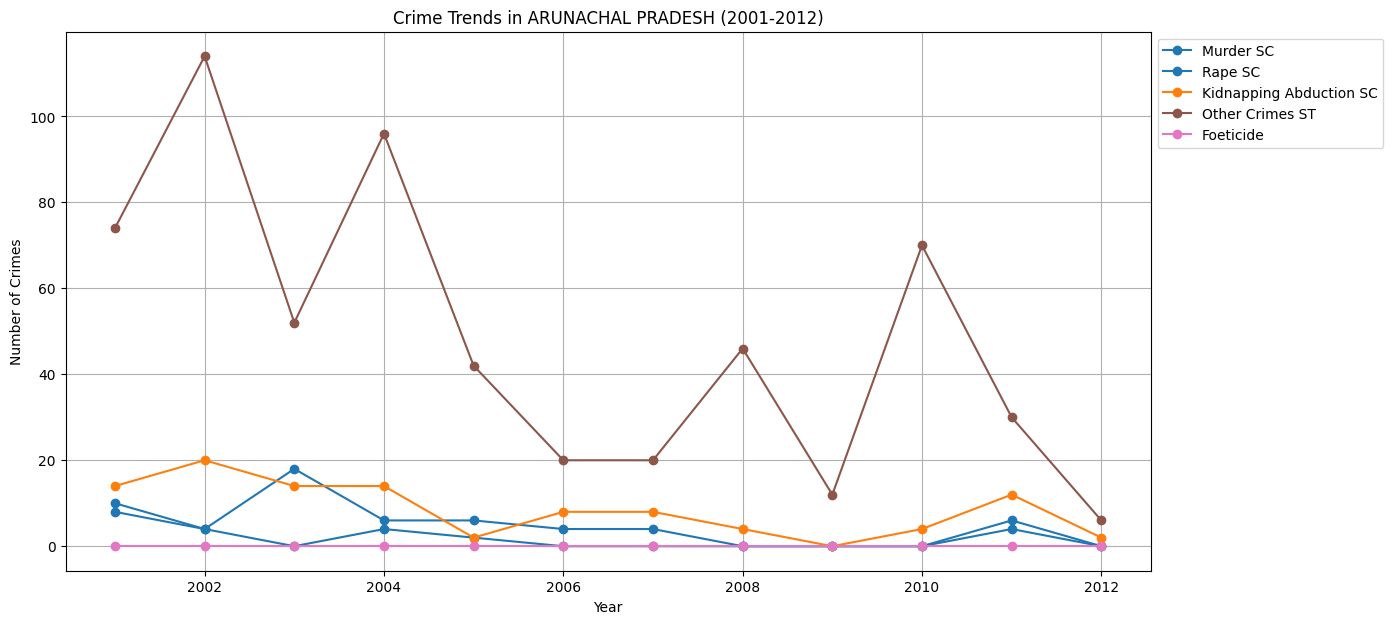

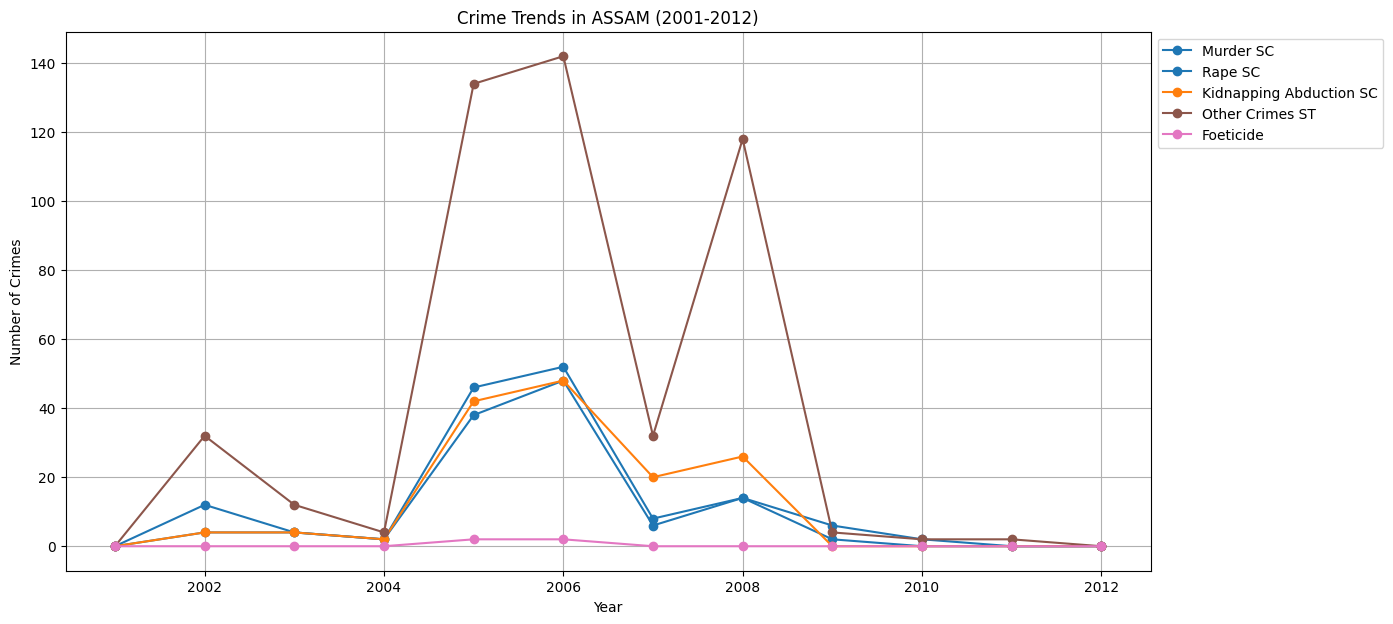

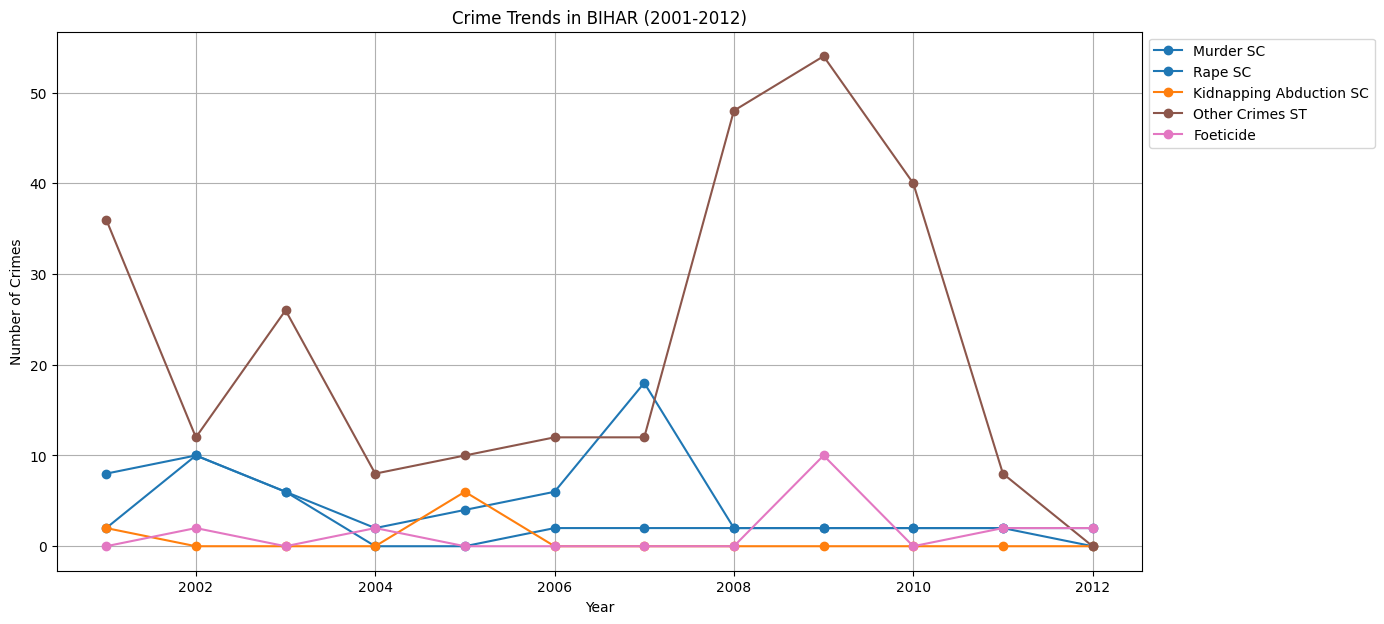

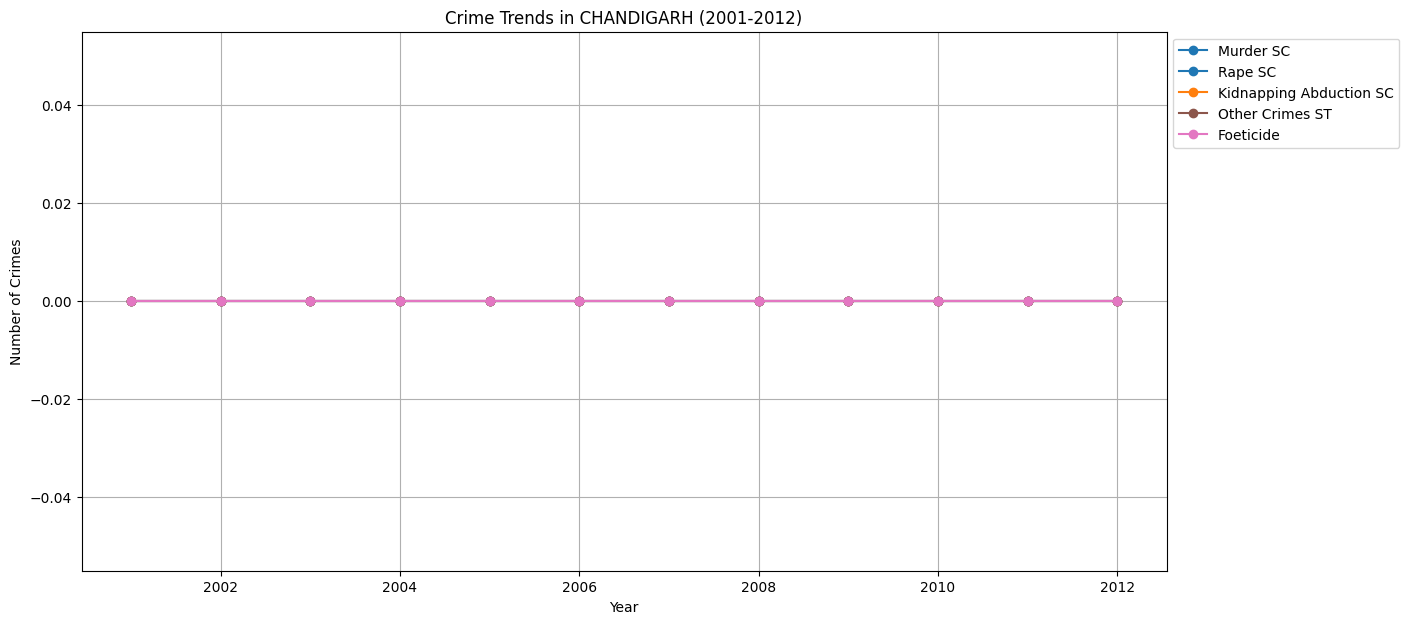

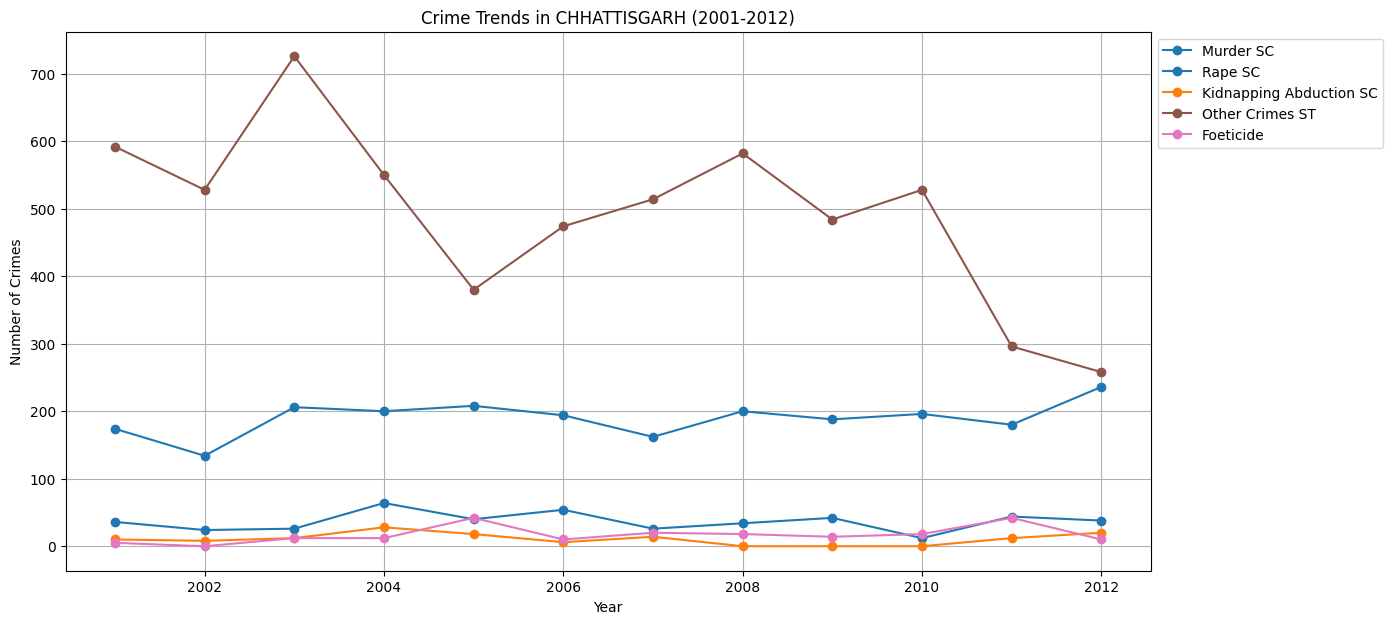

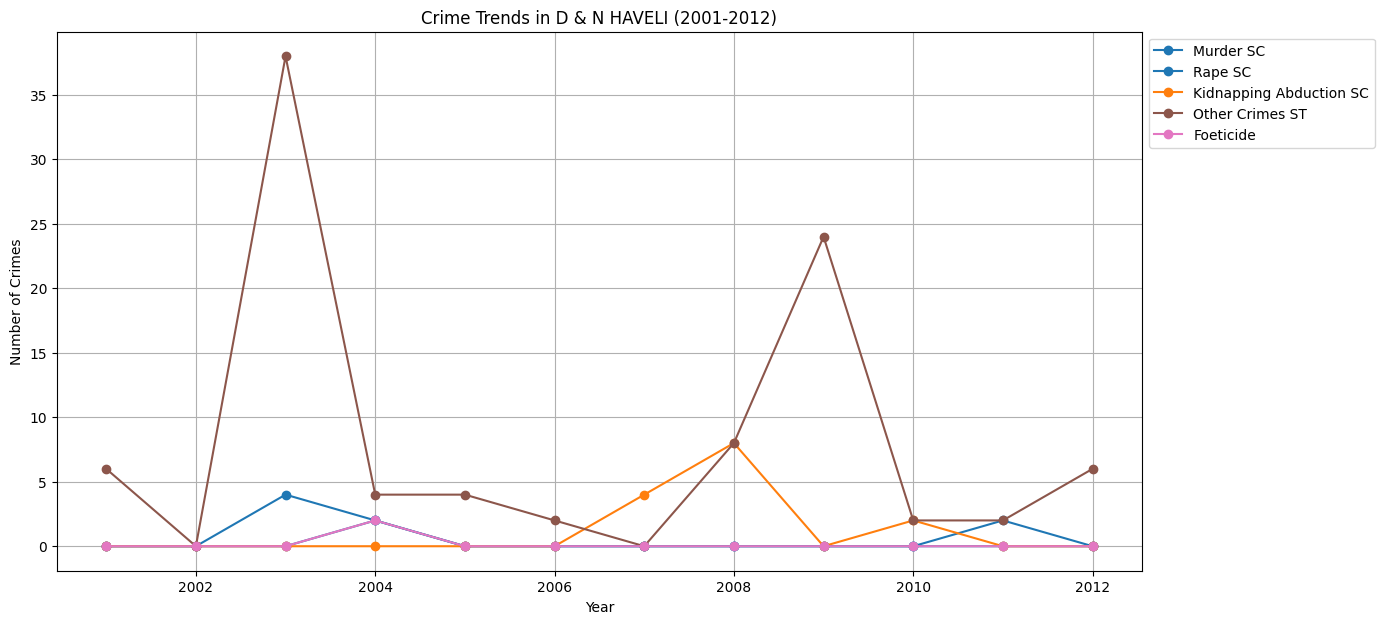

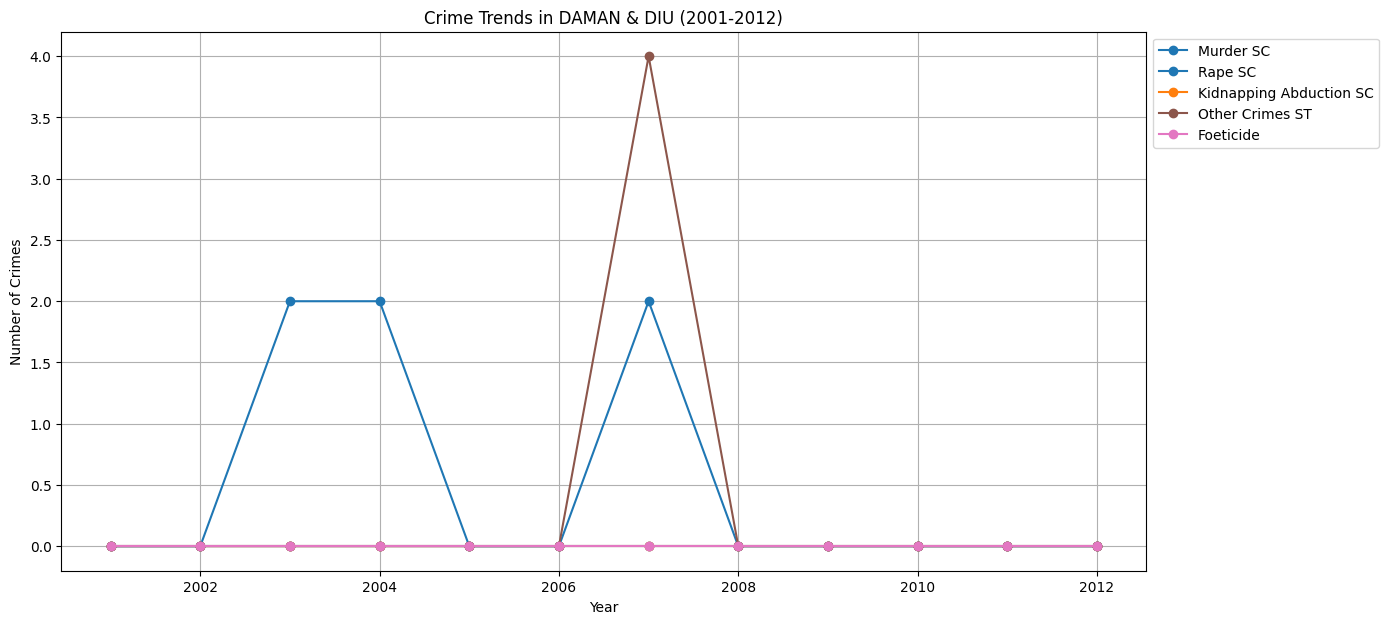

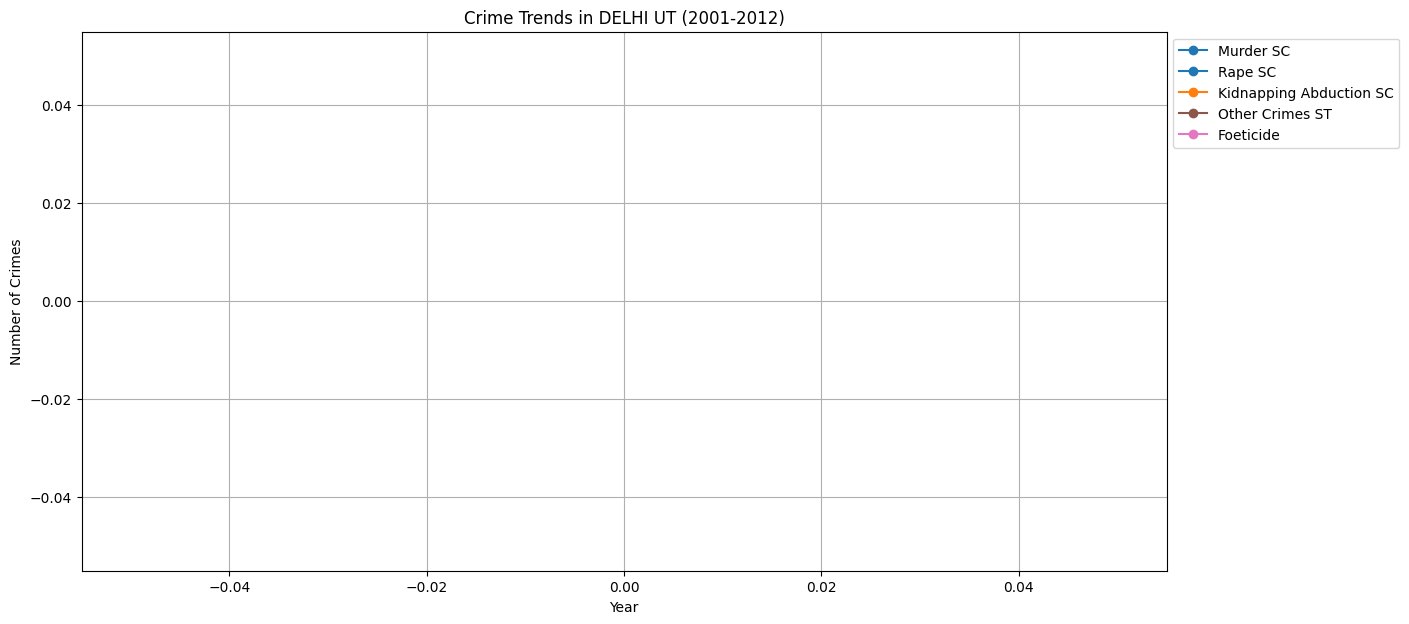

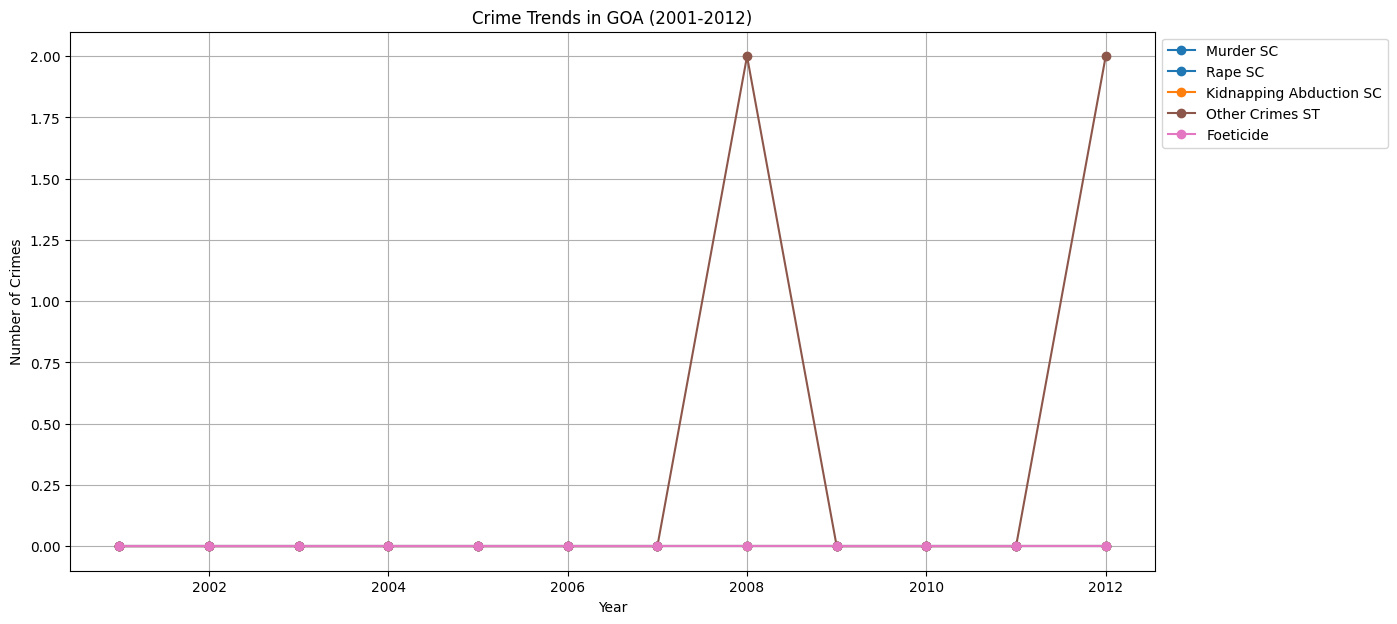

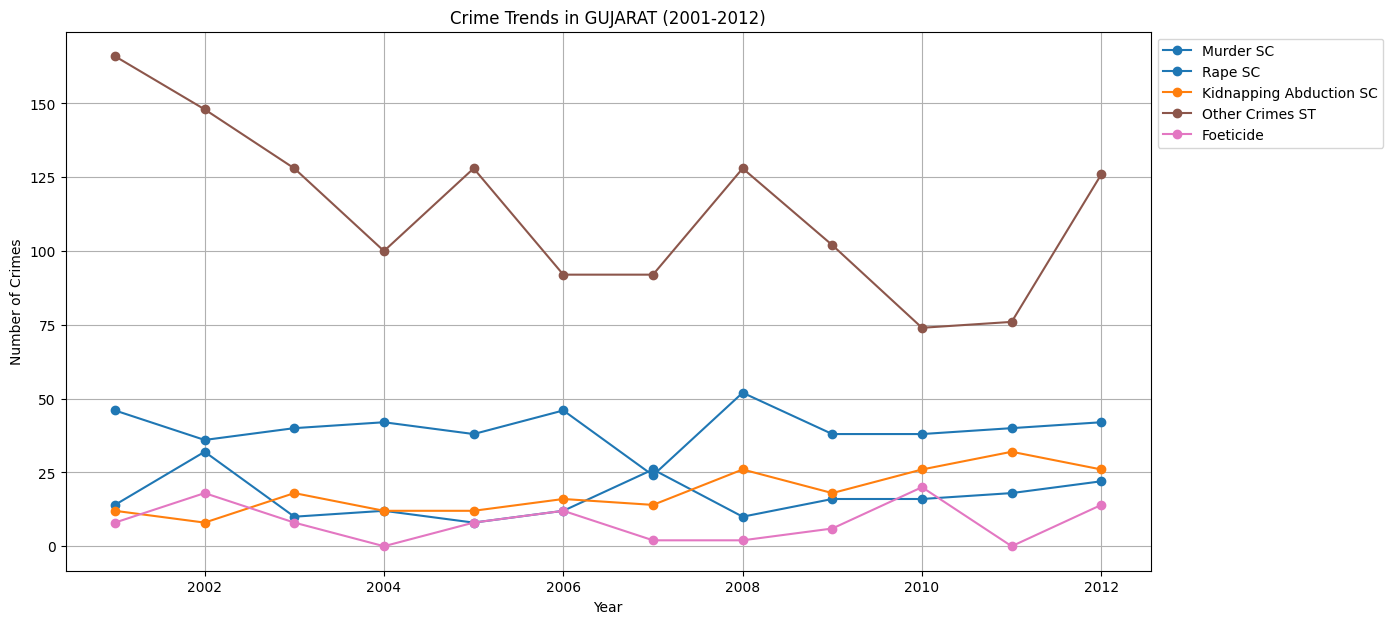

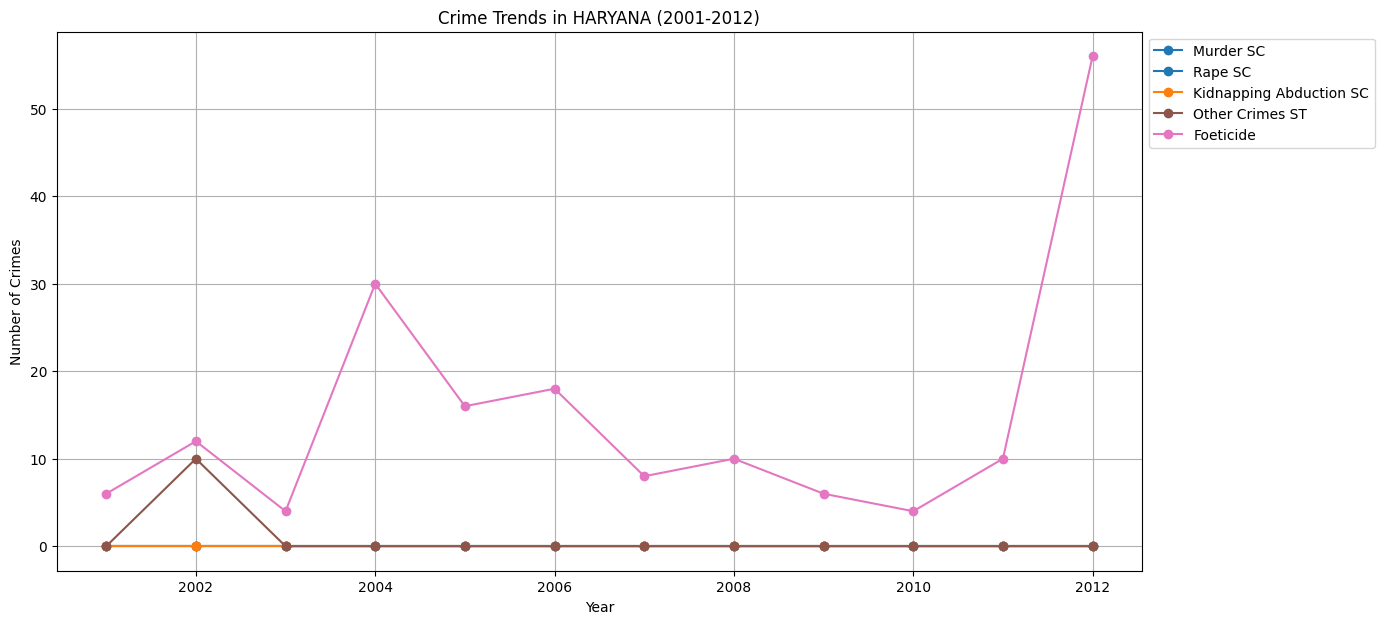

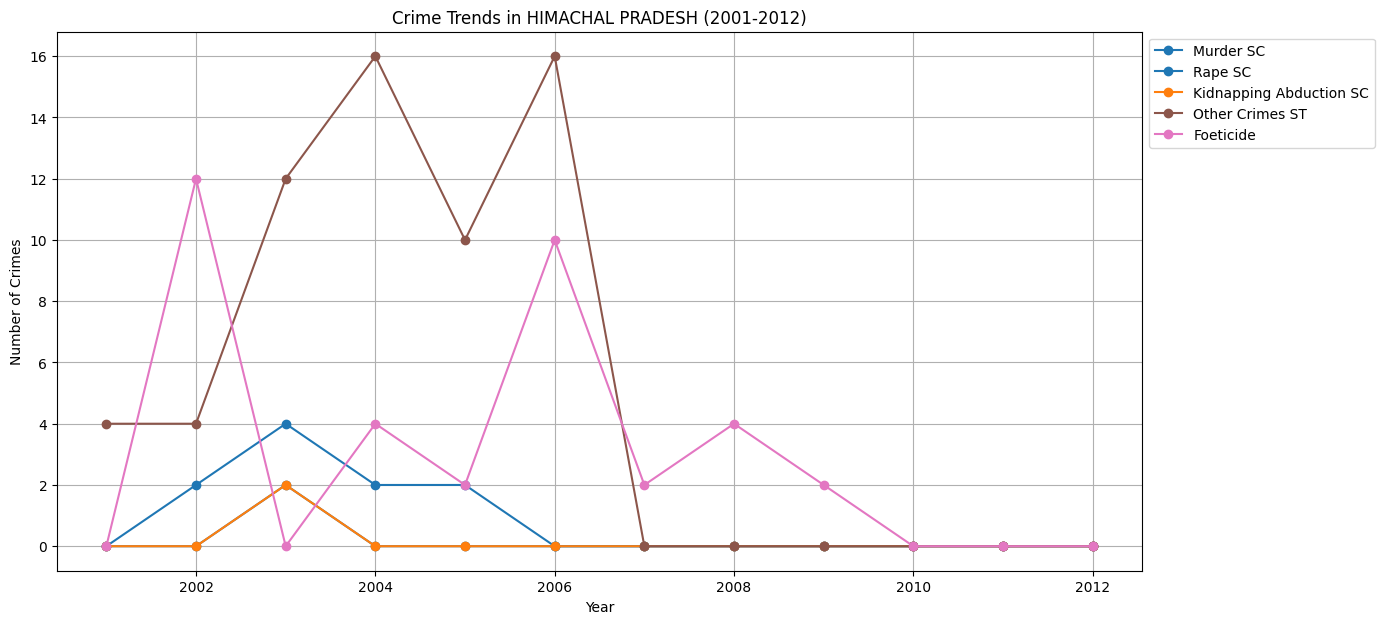

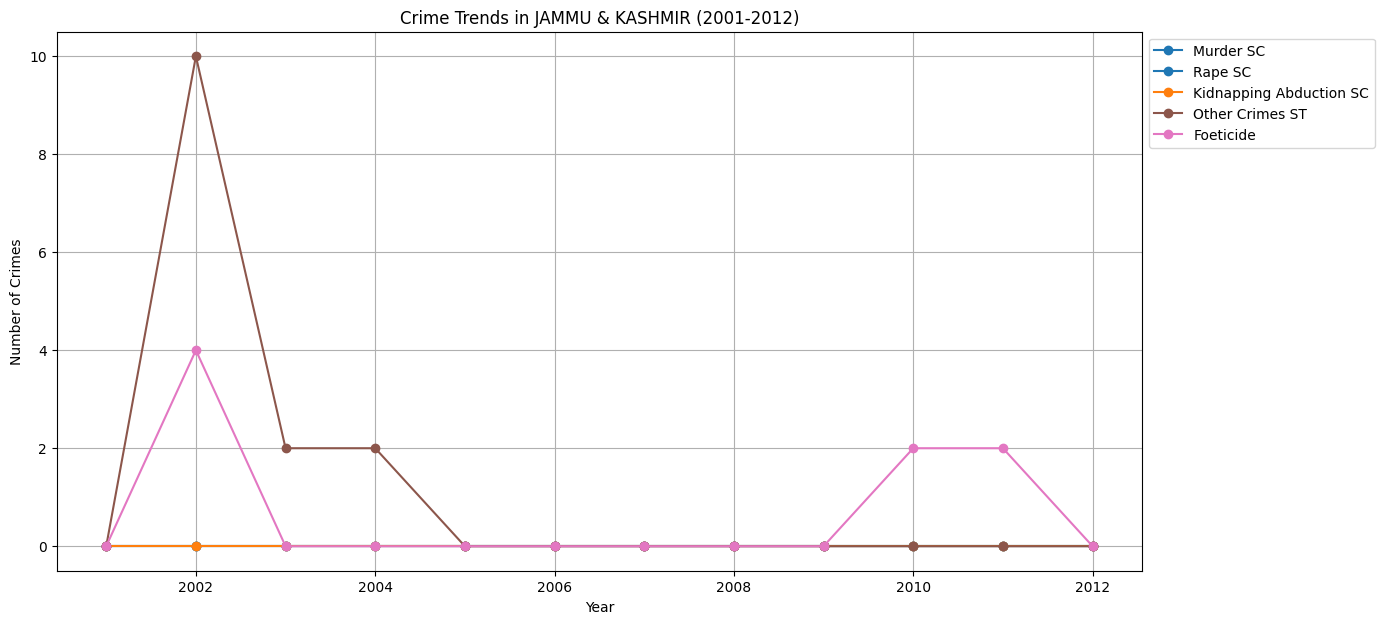

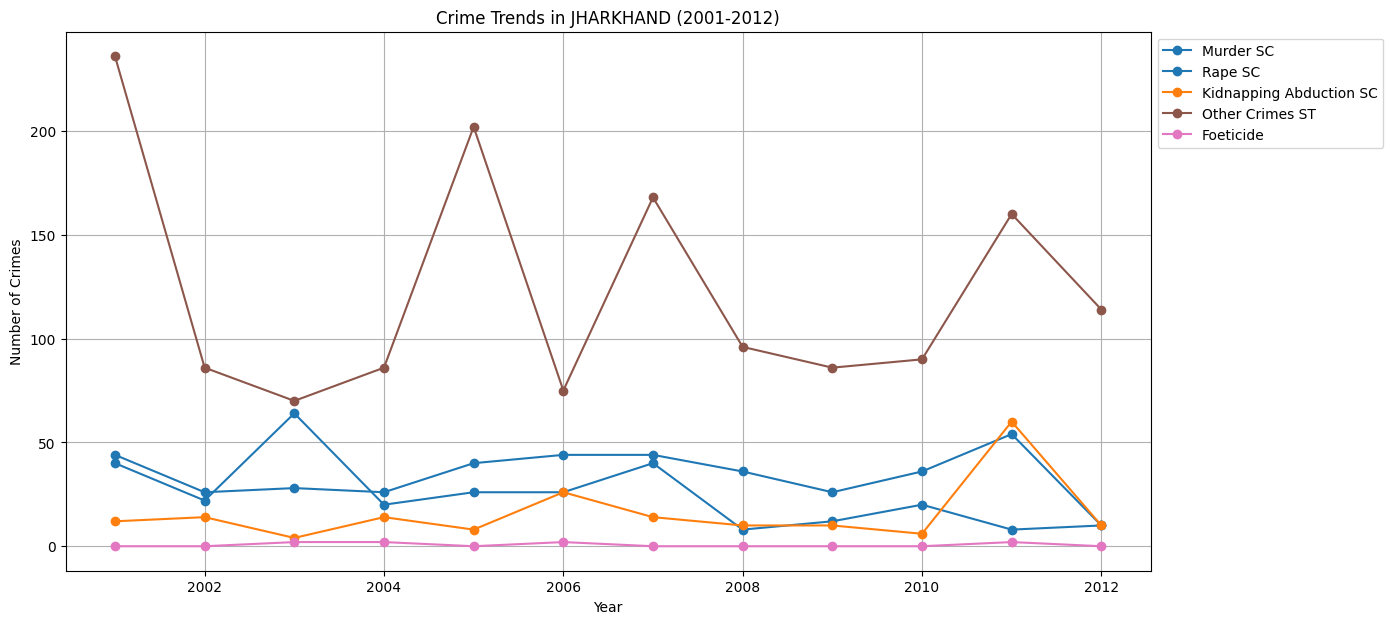

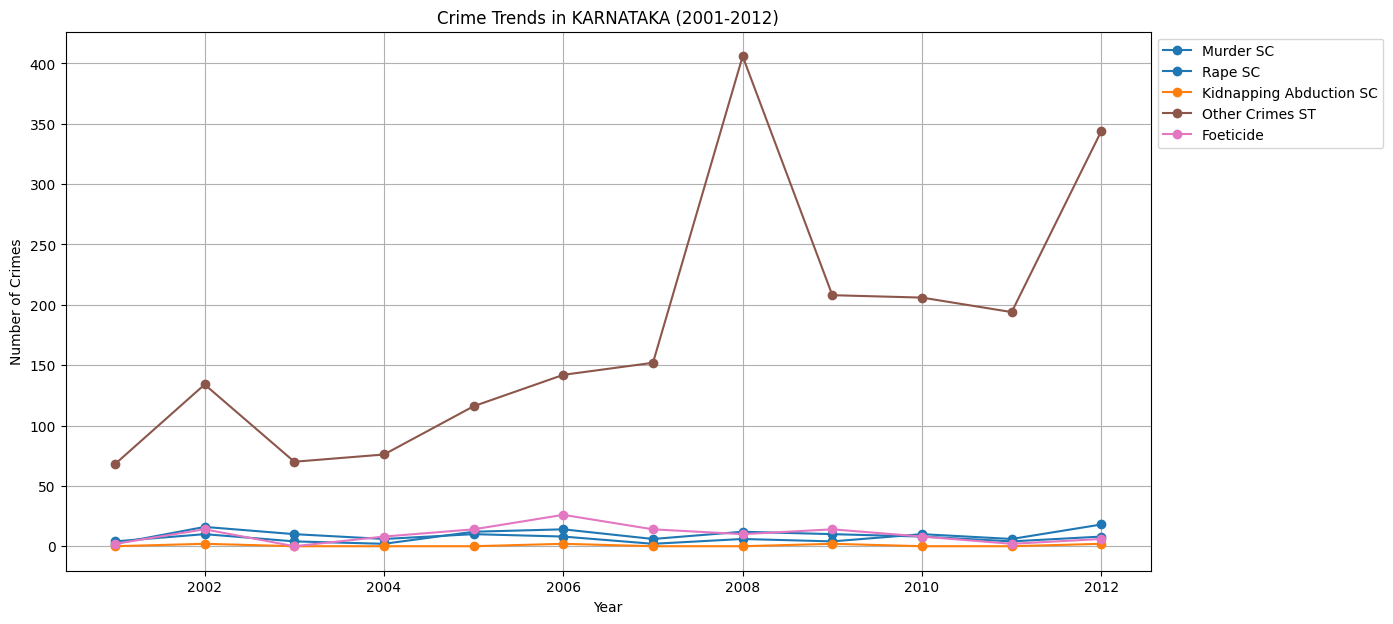

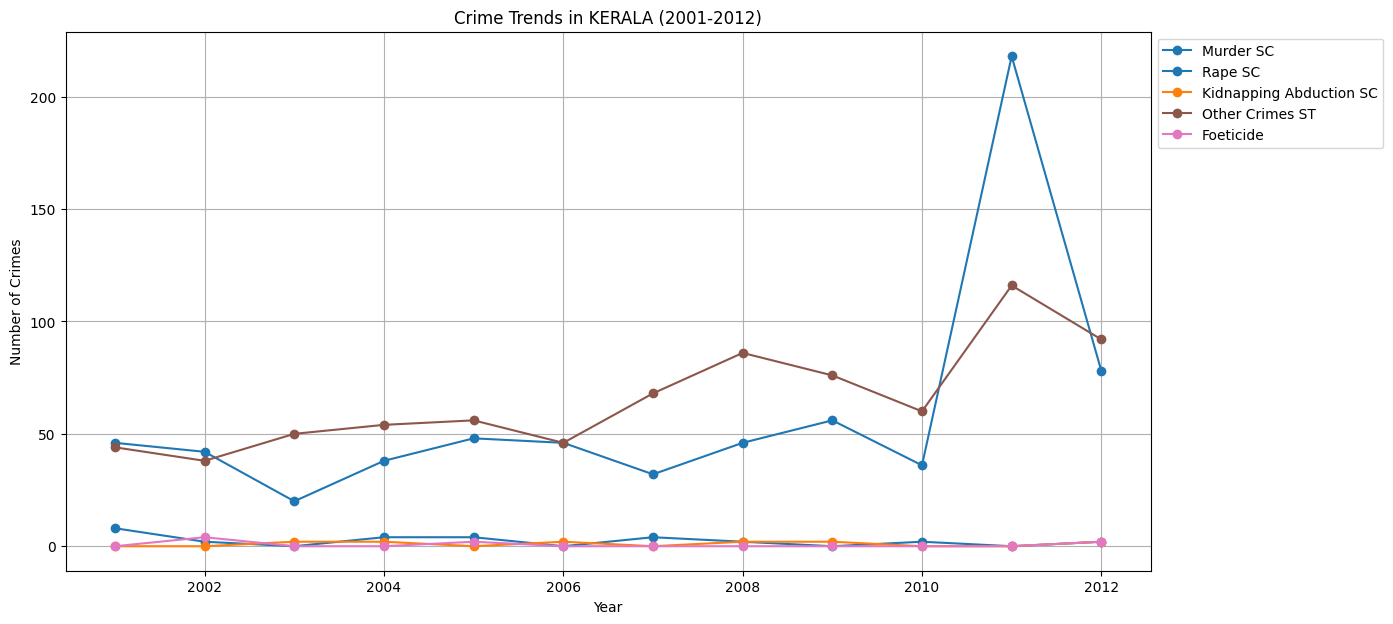

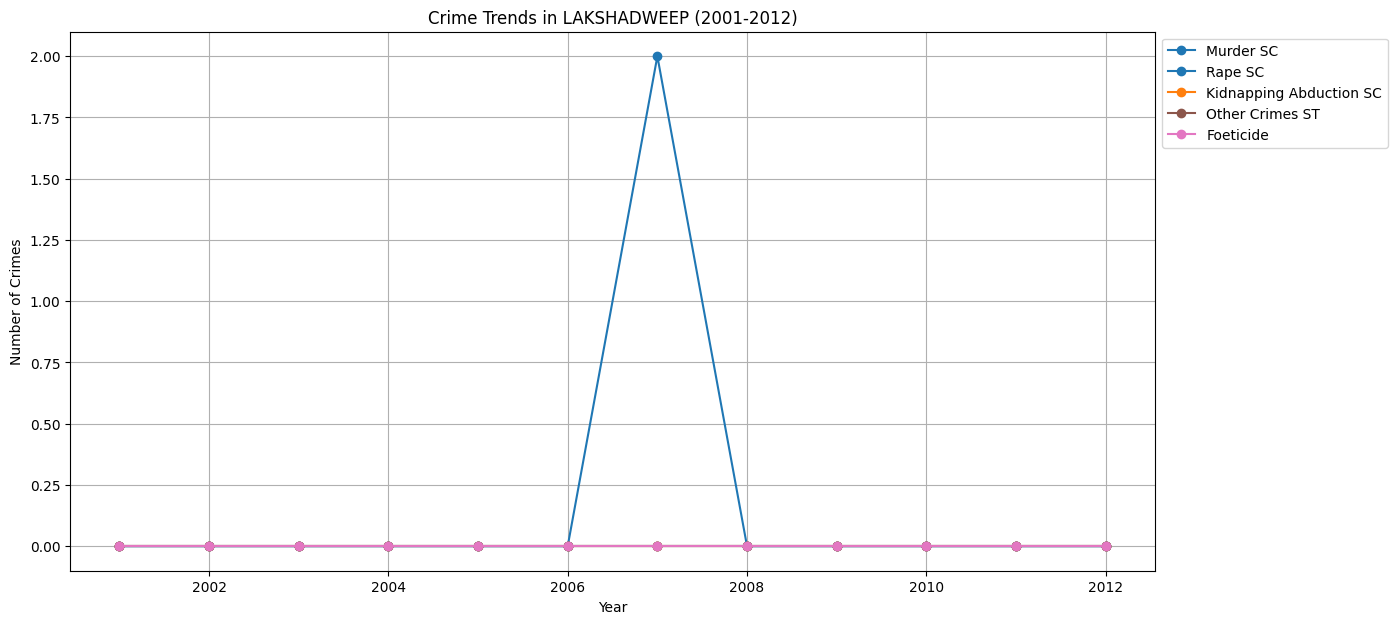

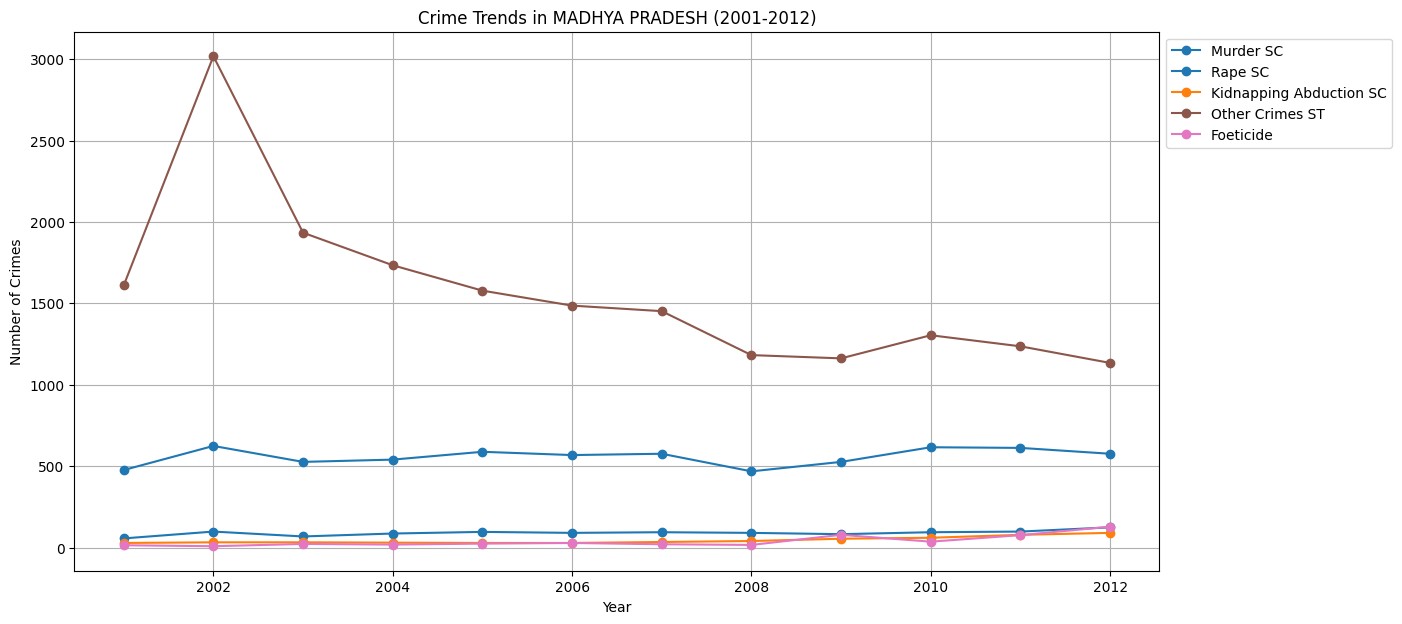

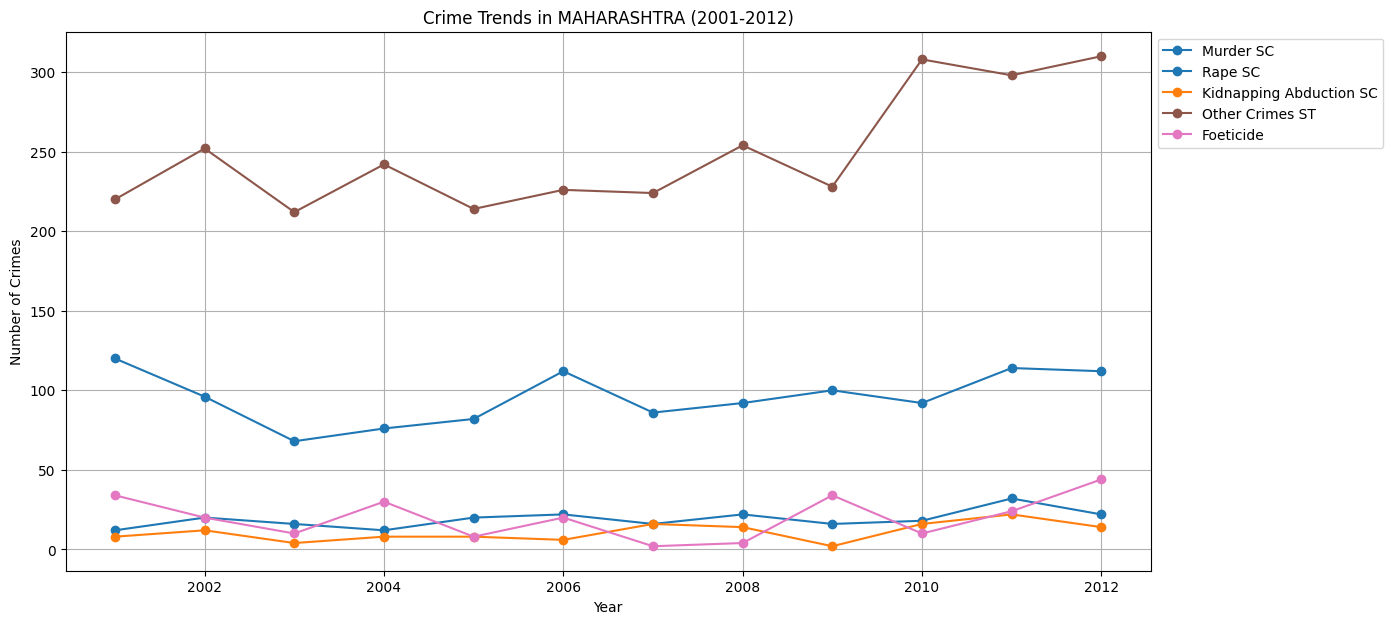

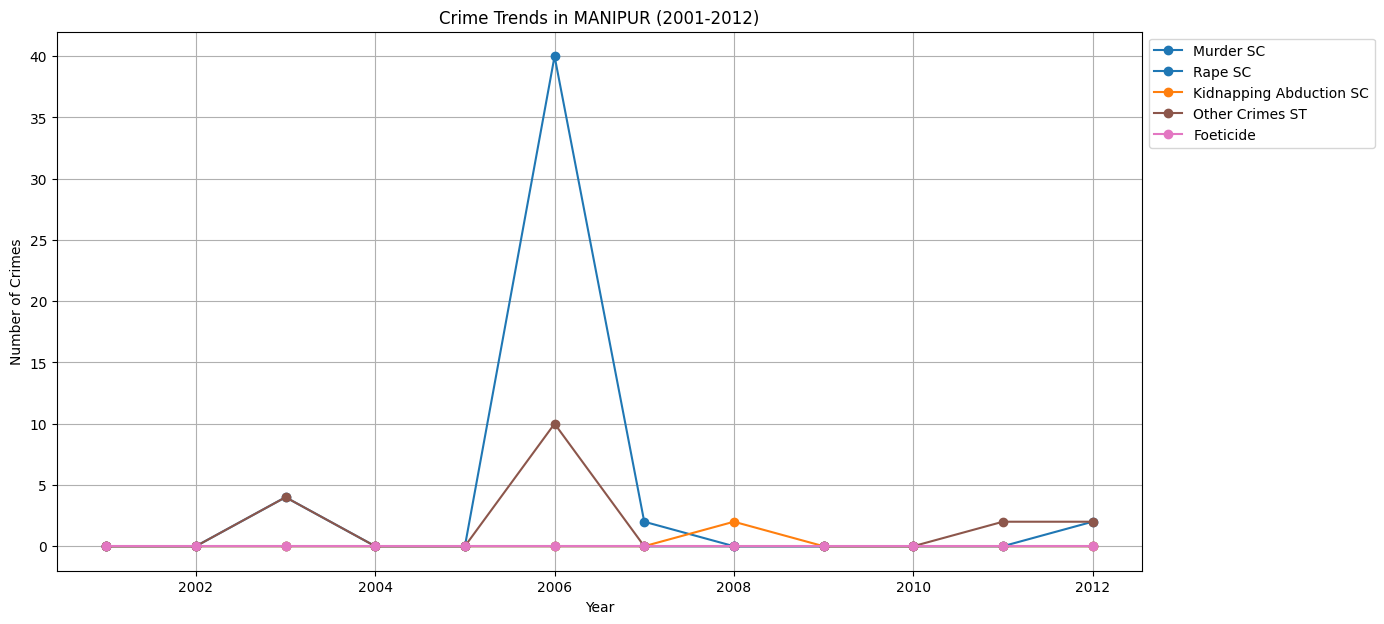

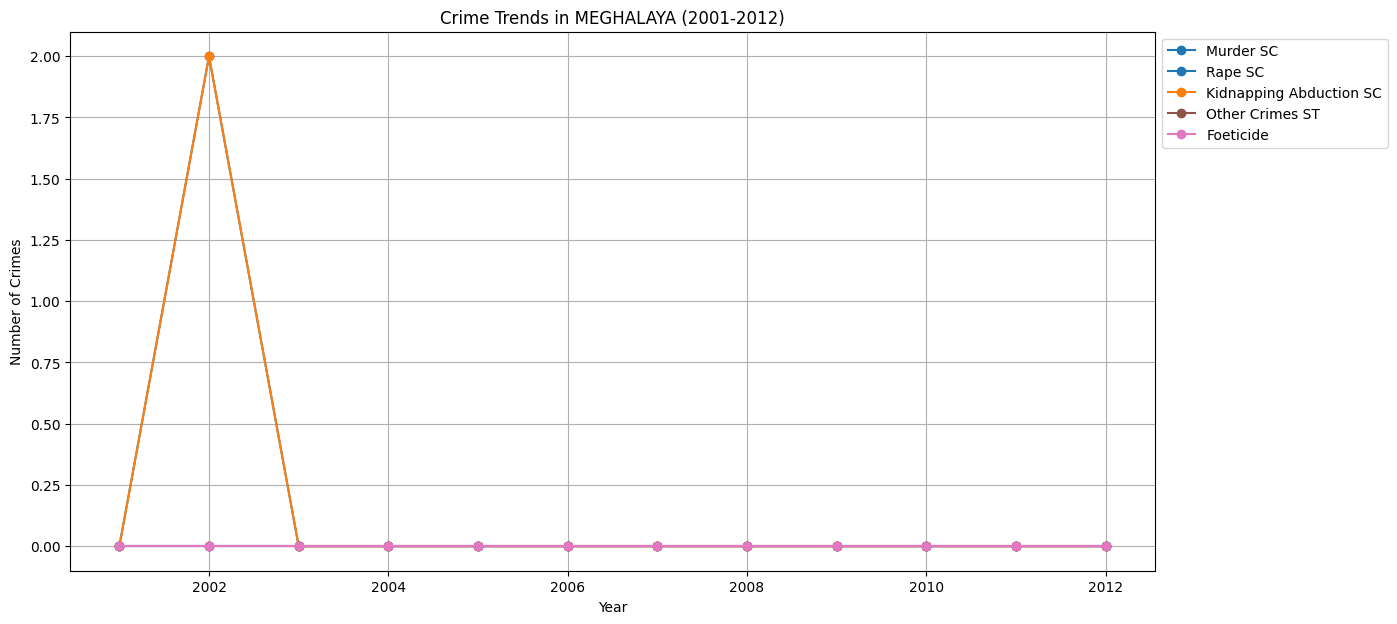

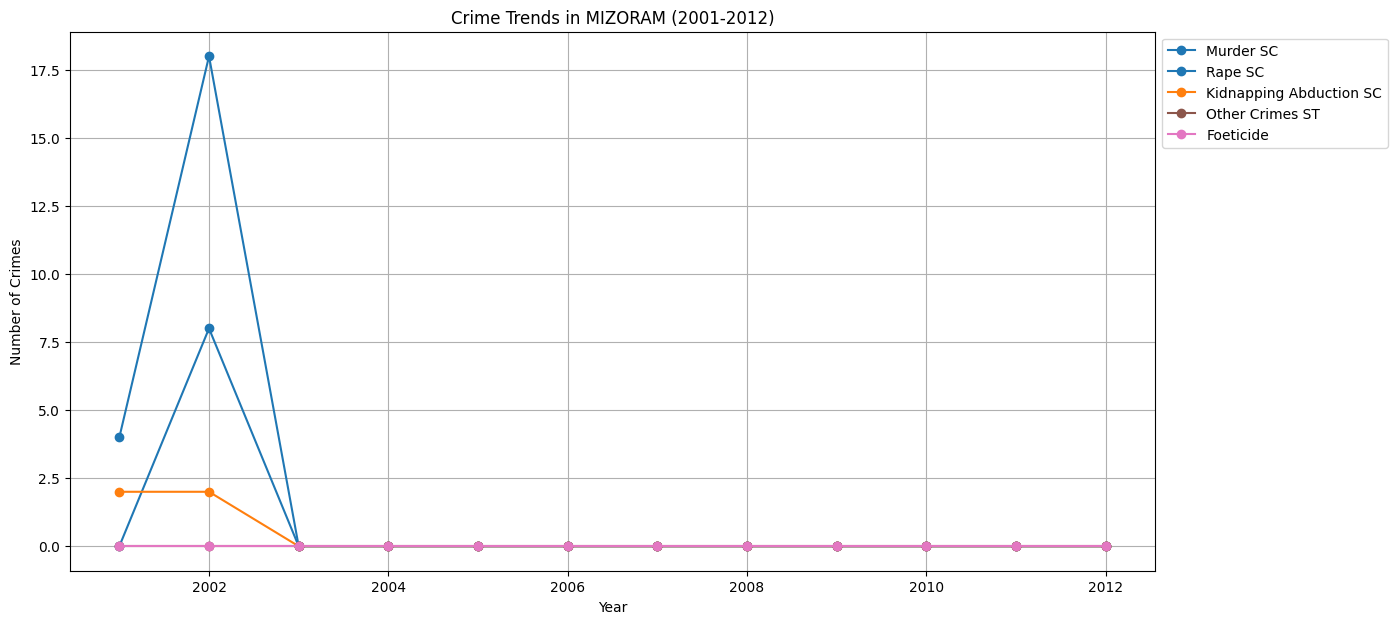

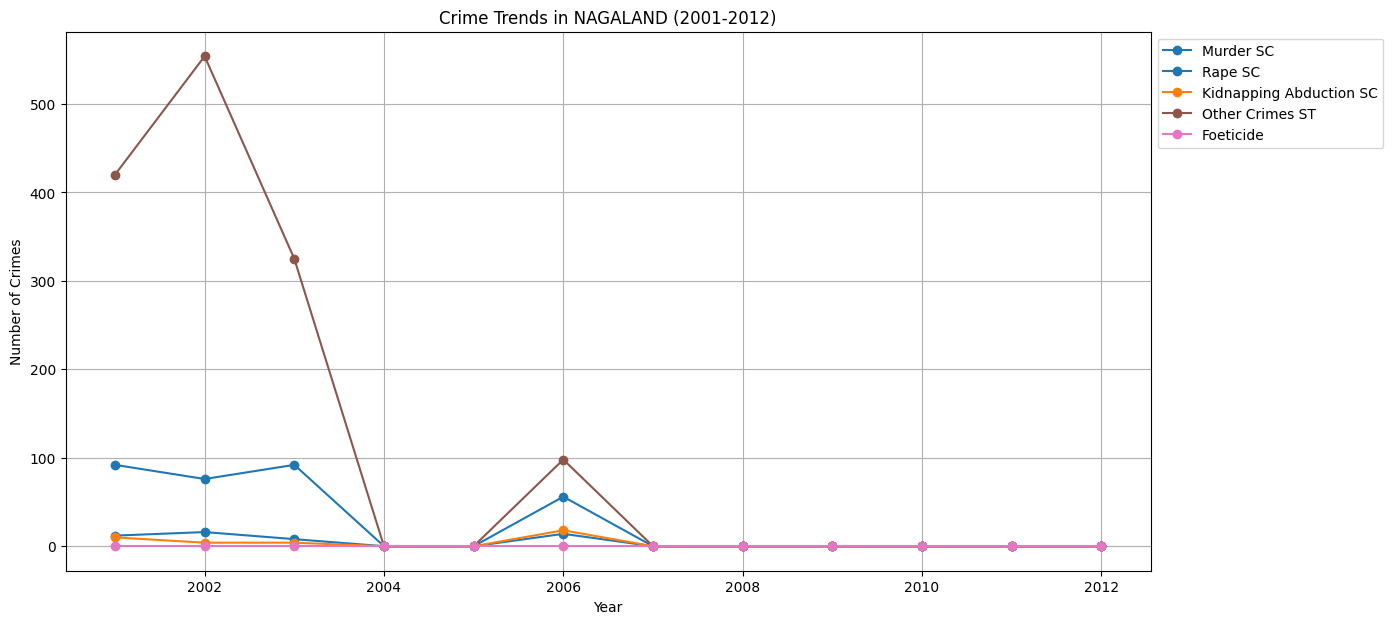

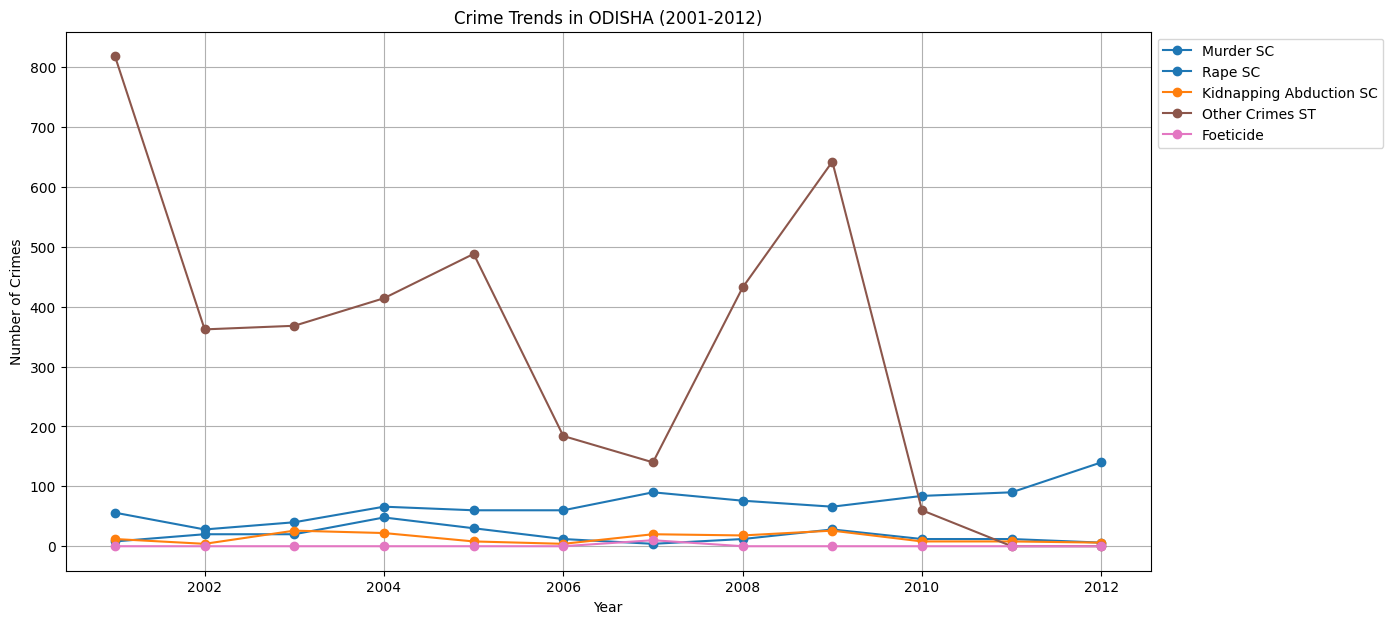

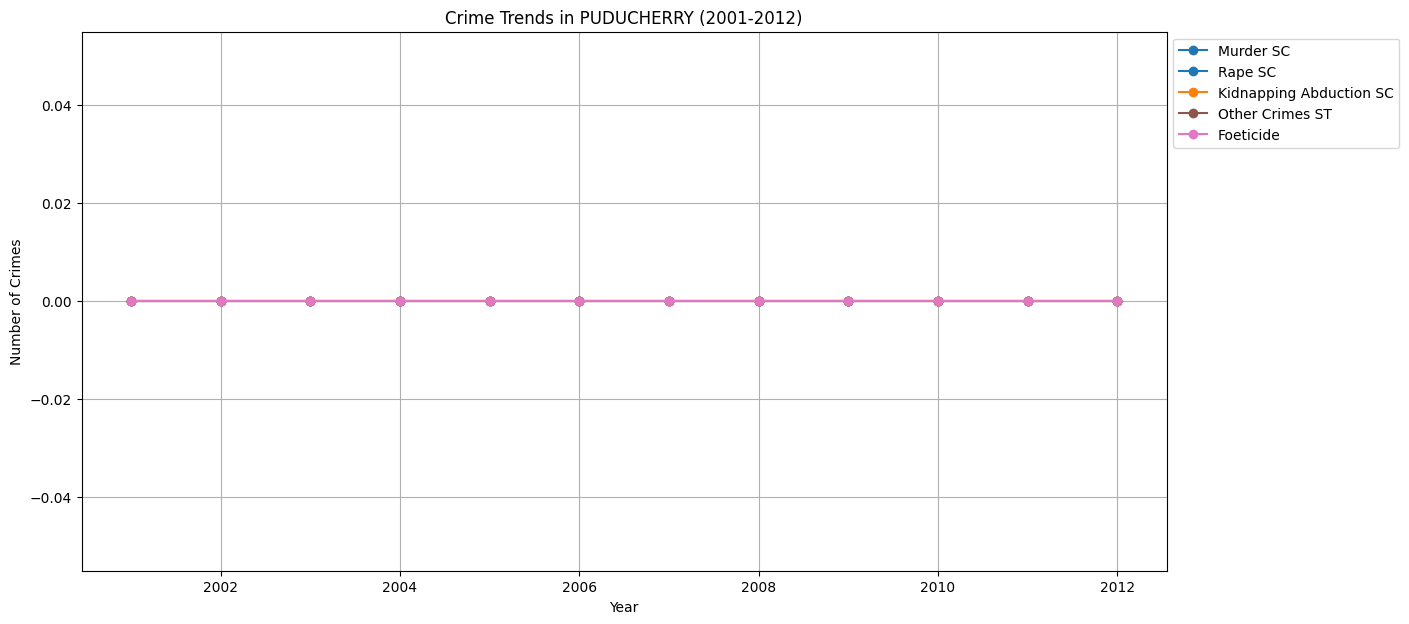

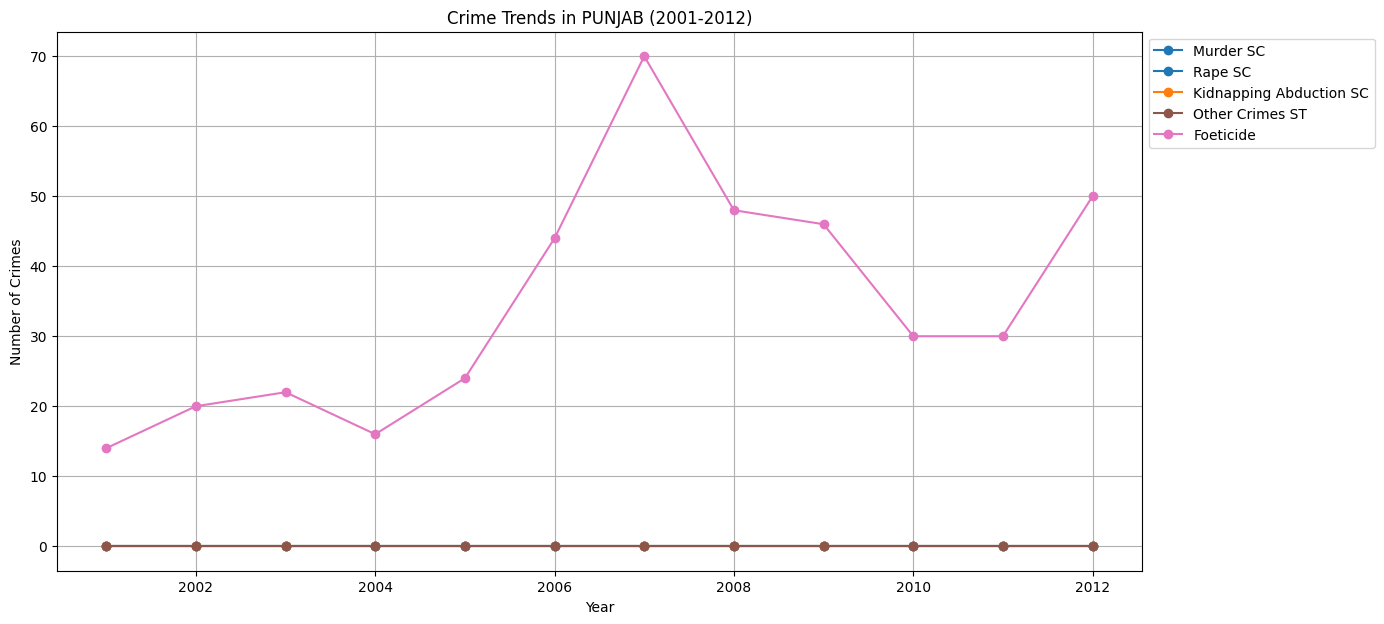

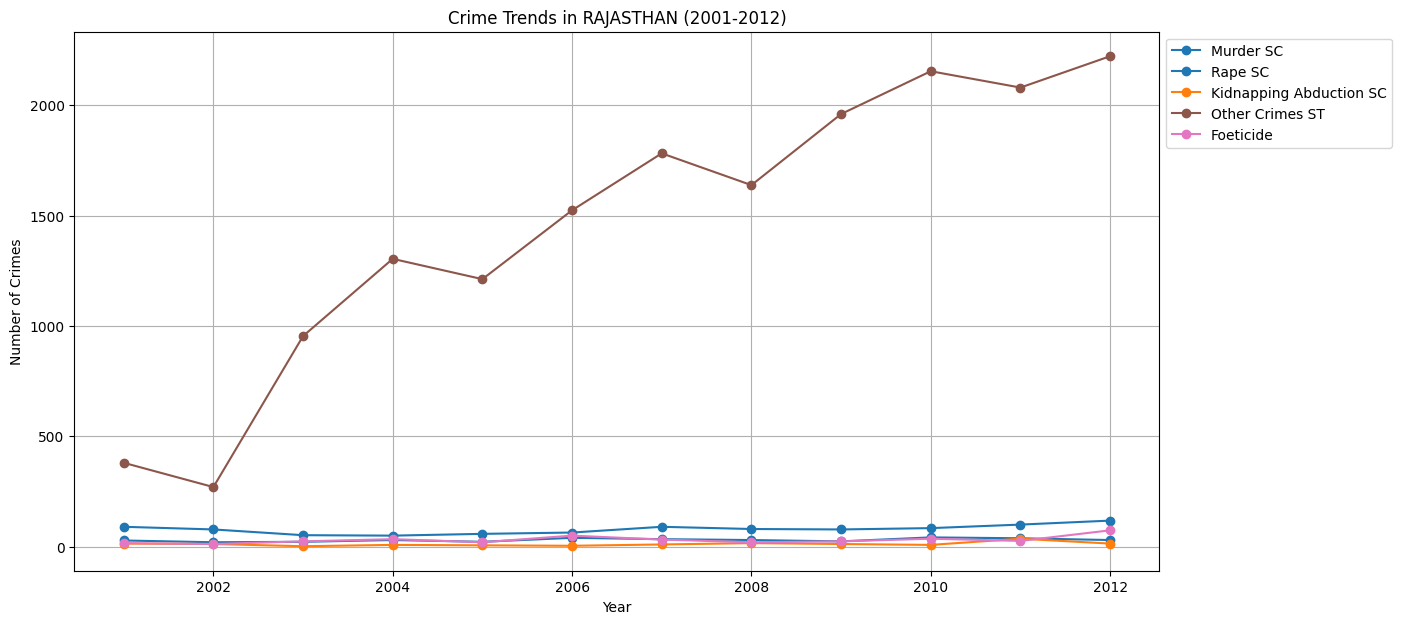

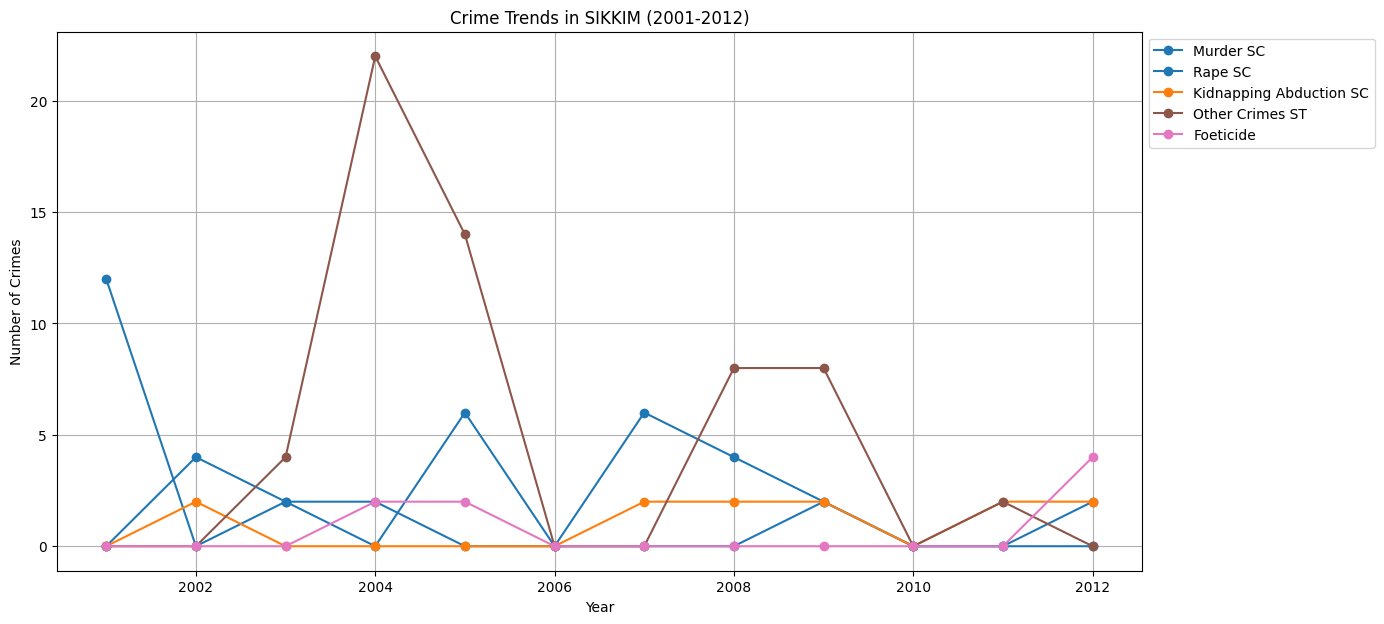

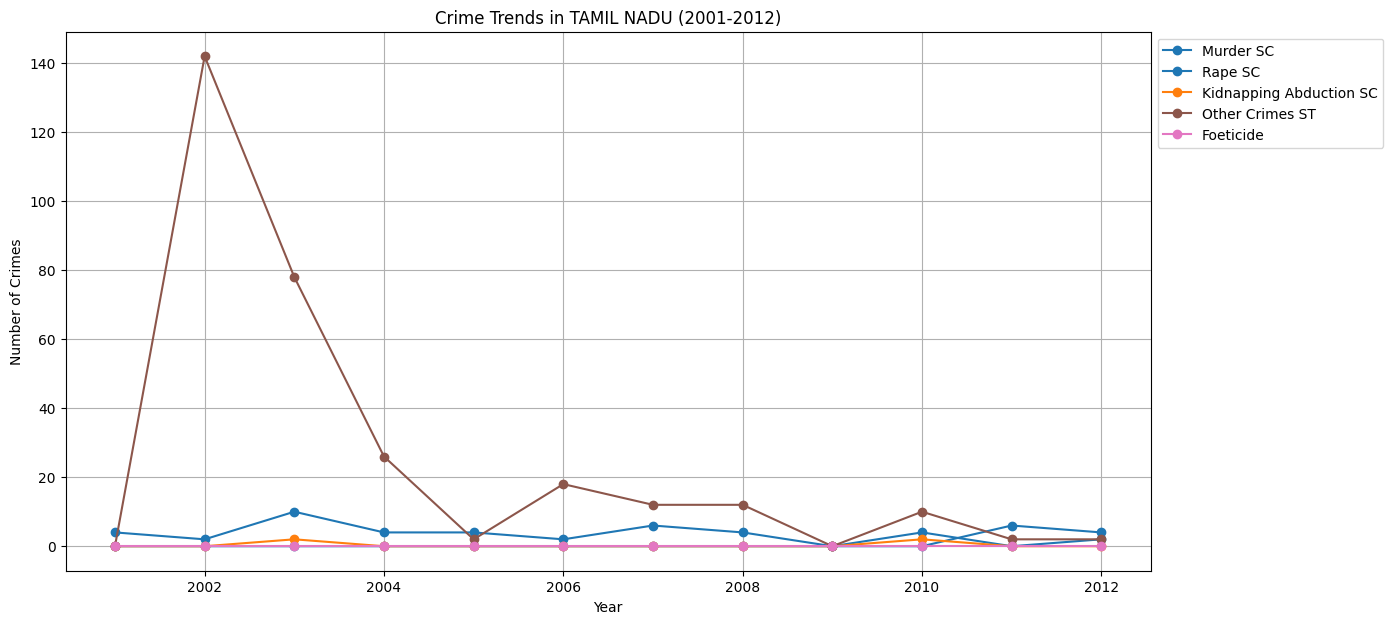

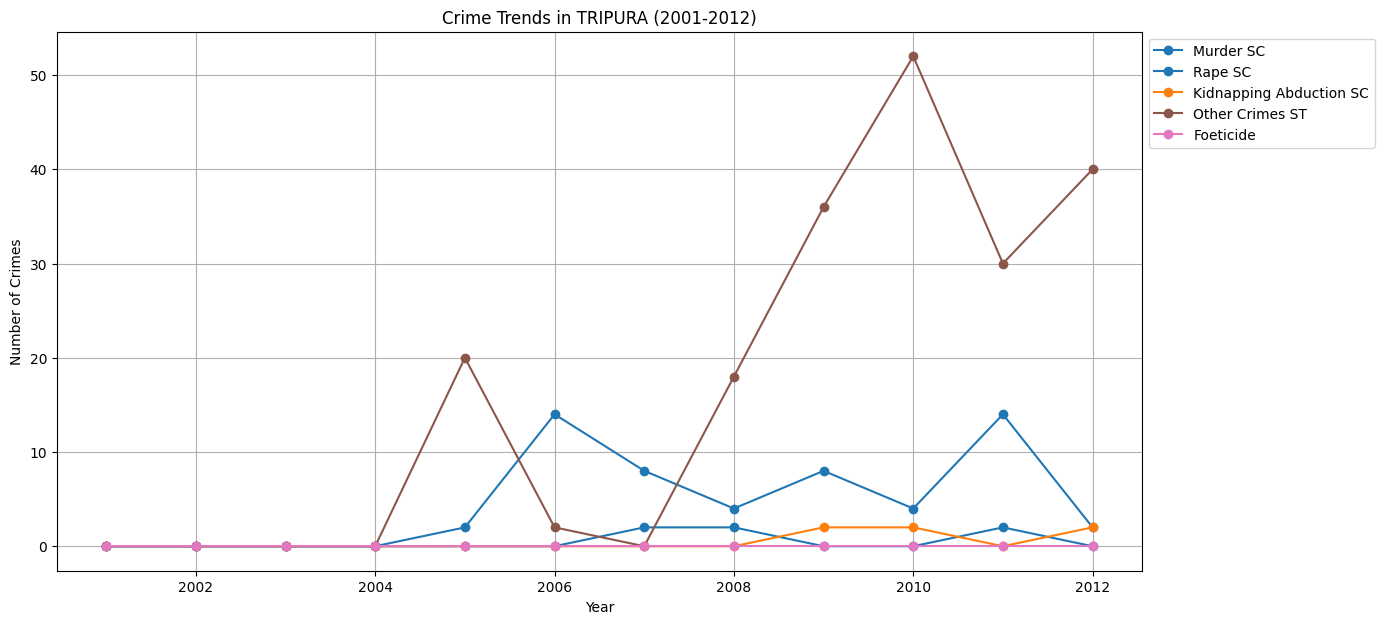

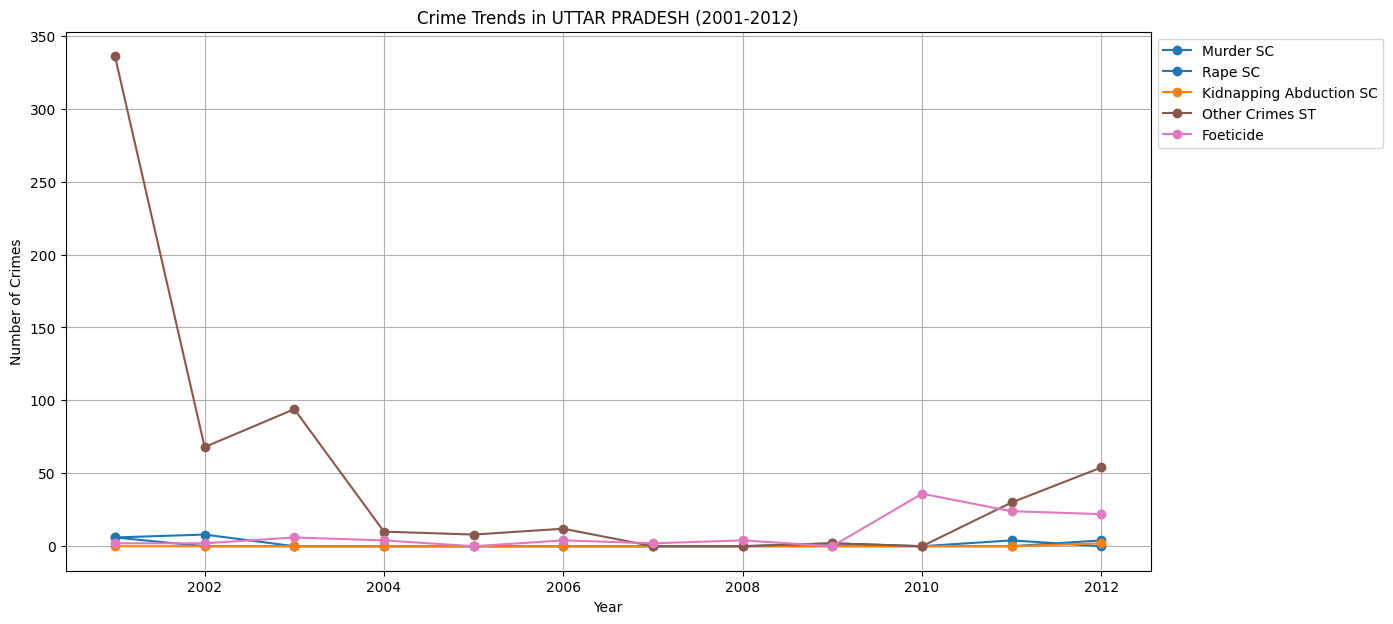

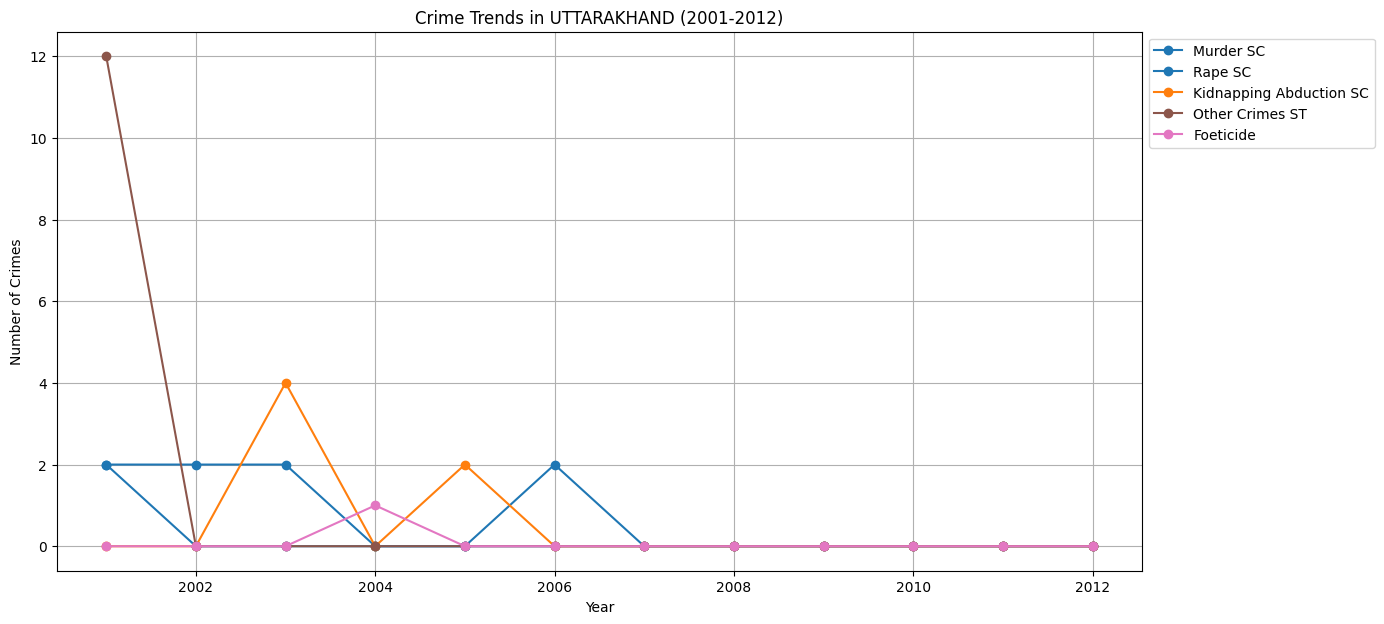

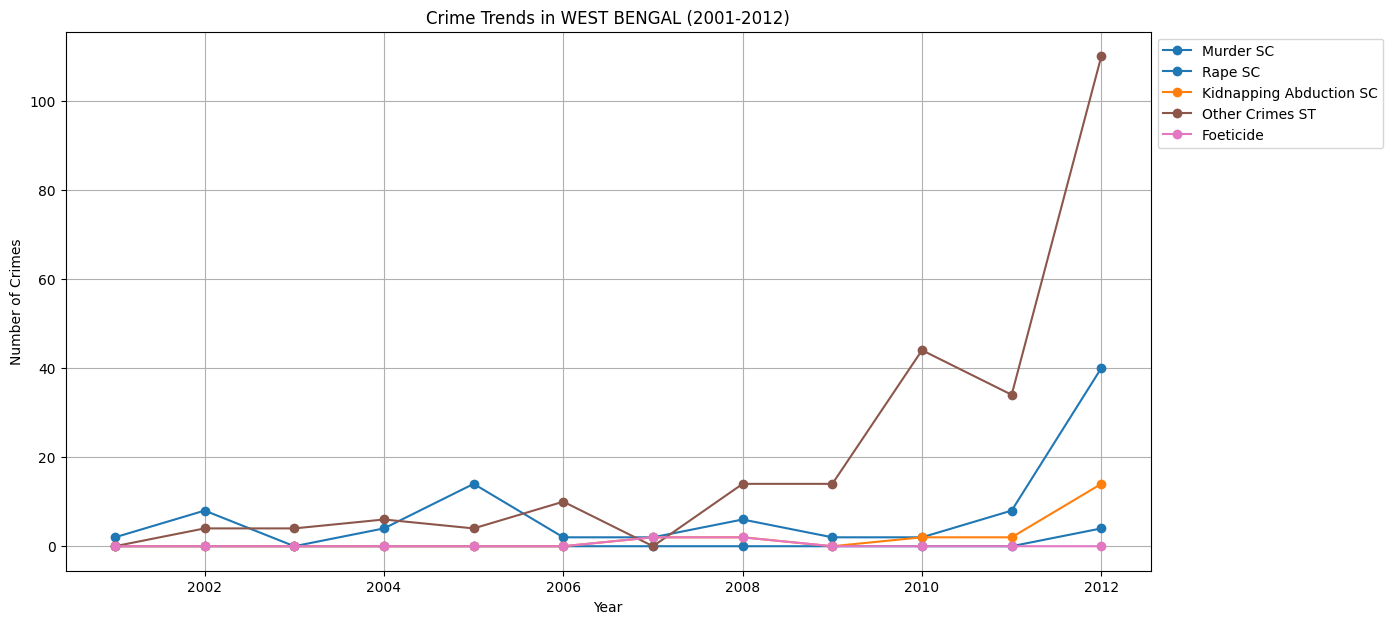

In [ ]:
import numpy as np

color_map = plt.cm.get_cmap("tab10", len(crime_columns))
crime_colors = {crime: color_map(i) for i, crime in enumerate(crime_columns)}

for state in unique_states:
    state_data = crime_trends[crime_trends["STATE/UT"] == state]

    plt.figure(figsize=(14, 7))

    for crime in crime_columns:
        if crime in state_data.columns:
            plt.plot(
                state_data["Year"], state_data[crime], 
                marker='o', linestyle='-', color=crime_colors[crime], label=crime.replace("_", " ")
            )

    plt.xlabel("Year")
    plt.ylabel("Number of Crimes")
    plt.title(f"Crime Trends in {state} (2001-2012)")
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.grid(True)
    plt.show()
